In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

# print mean_01
# print cov_01

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500) # data points from the multivariate normal distribution
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print dist_01.shape, dist_02.shape

(500, 2) (500, 2)


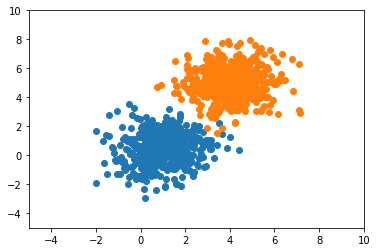

In [6]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1])#, color='red')
plt.show()

In [8]:
r = dist_01.shape[0] + dist_02.shape[0]
c = dist_01.shape[1] + 1
data = np.zeros((r, c))
print data.shape

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0

print data.mean(axis=0)

(1000, 3)
[2.48195166 2.71894537 0.5       ]


In [9]:
np.random.shuffle(data)
print data[:10]

[[ 4.9892525   3.91236894  1.        ]
 [ 0.14302793 -1.53122866  0.        ]
 [ 4.13650159  5.80008337  1.        ]
 [ 3.57804135  4.96407435  1.        ]
 [ 1.949403   -0.12799556  0.        ]
 [ 0.79464576  0.53336646  0.        ]
 [ 0.729971    2.1153682   0.        ]
 [ 3.95873563  4.39128858  1.        ]
 [ 2.59392064  1.7756923   0.        ]
 [ 2.42741935  4.40920594  1.        ]]


In [13]:

#x1 = (1,2,3)
#x2 = (4,5,6)
#sum1 = 0

#for i in range(len(x1)):
#    sum1 =  sum1 + (x1[i] - x2[i])**2
    
#sqrt(sum1)

# prefer vectorized implementation because theyare faster 

def distance(x1, x2):
    d = np.sqrt(((x1-x2)**2).sum()) # not using any loops 
    return d

def knn(X_train, y_train, xt, k=7):
    
    vals = []
    
    for ix in range(X_train.shape[0]):
        
        d = distance(X_train[ix], xt)
        vals.append([d, y_train[ix]])
        
    sorted_labels = sorted(vals, key=lambda z: z[0])
    
    neighbours = np.asarray(sorted_labels)[:k, -1]
    
    freq = np.unique(neighbours, return_counts=True) # majority voting 
    
    return freq[0][freq[1].argmax()]

In [14]:
test_point = np.array([8, -4])

print knn(data[:, :2], data[:, -1], test_point)

0.0


In [15]:
np.random.shuffle(data)

split = int(0.75 * data.shape[0])

# print split

train_data_X = data[:split, :2]
train_data_y = data[:split, -1]
test_data_X = data[split:, :2]
test_data_y = data[split:, -1]

print train_data_X.shape, train_data_y.shape
print test_data_X.shape, test_data_y.shape

# split the data into a 75% and 25% split overall 


(750, 2) (750,)
(250, 2) (250,)


In [17]:
def get_acc(kx): # testing accuracy 
    preds = []
    # print kx
    for ix in range(test_data_X.shape[0]):
        preds.append(knn(train_data_X, train_data_y, test_data_X[ix], k=kx))
    preds = np.asarray(preds)
    
    # print preds.shape
    return 100*float((test_data_y == preds).sum())/preds.shape[0]

print get_acc(12) # k = 12 

99.6


In [18]:
for ix in range(1, 50):
    print "k:", ix, "| Acc:", get_acc(ix)

k: 1 | Acc: 99.2
k: 2 | Acc: 98.4
k: 3 | Acc: 99.6
k: 4 | Acc: 99.6
k: 5 | Acc: 99.6
k: 6 | Acc: 99.6
k: 7 | Acc: 99.6
k: 8 | Acc: 99.6
k: 9 | Acc: 99.6
k: 10 | Acc: 99.6
k: 11 | Acc: 99.6
k: 12 | Acc: 99.6
k: 13 | Acc: 99.6
k: 14 | Acc: 99.2
k: 15 | Acc: 99.2
k: 16 | Acc: 99.2
k: 17 | Acc: 99.2
k: 18 | Acc: 99.2
k: 19 | Acc: 99.2
k: 20 | Acc: 99.2
k: 21 | Acc: 99.2
k: 22 | Acc: 99.2
k: 23 | Acc: 99.2
k: 24 | Acc: 99.2
k: 25 | Acc: 99.2
k: 26 | Acc: 99.2
k: 27 | Acc: 99.2
k: 28 | Acc: 99.2
k: 29 | Acc: 99.2
k: 30 | Acc: 99.2
k: 31 | Acc: 99.2
k: 32 | Acc: 99.2
k: 33 | Acc: 99.2
k: 34 | Acc: 99.2
k: 35 | Acc: 99.2
k: 36 | Acc: 99.2
k: 37 | Acc: 99.2
k: 38 | Acc: 99.2
k: 39 | Acc: 99.2
k: 40 | Acc: 99.2
k: 41 | Acc: 99.2
k: 42 | Acc: 99.2
k: 43 | Acc: 99.2
k: 44 | Acc: 99.2
k: 45 | Acc: 99.2
k: 46 | Acc: 99.2
k: 47 | Acc: 99.2
k: 48 | Acc: 99.2
k: 49 | Acc: 99.2


In [19]:
import pandas as pd
import datetime

In [21]:
import keras 
from keras.datasets import mnist

Using TensorFlow backend.


In [31]:
data = df.values[:2000]
print data.shape

(2000, 785)


In [35]:
# 80% 20% 

split = int(0.8 * data.shape[0])

X_train = data[:split, 1:]
X_test = data[split:, 1:]

y_train = data[:split, 0]
y_test = data[split:, 0]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(1600, 784) (1600,)
(400, 784) (400,)


3


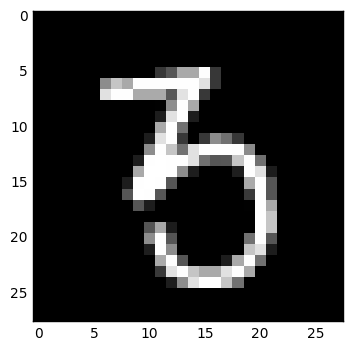

In [33]:
plt.figure(0)
plt.imshow(X_train[90].reshape((28, 28)), cmap='gray', interpolation='none')
print y_train[90]
plt.show()

In [36]:
def get_acc(kx):
    preds = []
    # print kx
    for ix in range(X_test.shape[0]):
        start = datetime.datetime.now()
        preds.append(knn(X_train, y_train, X_test[ix], k=kx))
        # print datetime.datetime.now() - start
    preds = np.asarray(preds)
    
    # print preds.shape
    return 100*float((y_test == preds).sum())/preds.shape[0]

print get_acc(kx=15) # k =15 % MNIST dataset --> 99.5% 

86.75
